# Import Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
#import wine CSVs
red_csv = "Data/winequality-red.csv"
white_csv = "Data/winequality-white.csv"

In [3]:
red = pd.read_csv(red_csv)
white= pd.read_csv(white_csv)

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#assign data to X and y
red_X = red[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
red_y = red["quality"].values.reshape(-1, 1)
print(red_X.shape, red_y.shape)

(1599, 11) (1599, 1)


In [5]:
#train test split
from sklearn.model_selection import train_test_split

redX_train, redX_test, redy_train, redy_test = train_test_split(red_X, red_y, stratify=red_y, random_state=42)

In [6]:
#scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
redX_scaler = StandardScaler().fit(redX_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models
redX_train_scaled = redX_scaler.transform(redX_train)
redX_test_scaled = redX_scaler.transform(redX_test)

In [8]:
number_list = np.array(redy_train)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   8],
       [  4,  40],
       [  5, 511],
       [  6, 478],
       [  7, 149],
       [  8,  13]], dtype=int64)

In [9]:
number_list = np.array(redy_test)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   2],
       [  4,  13],
       [  5, 170],
       [  6, 160],
       [  7,  50],
       [  8,   5]], dtype=int64)

# Red Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
red_classifier = LogisticRegression(max_iter = 10000)
red_classifier

LogisticRegression(max_iter=10000)

In [13]:
red_classifier = red_classifier.fit(redX_train, redy_train.ravel())

In [14]:
print(f"Training Data Score: {red_classifier.score(redX_train, redy_train)}")
print(f"Testing Data Score: {red_classifier.score(redX_test, redy_test)}")

Training Data Score: 0.609674728940784
Testing Data Score: 0.585


In [15]:
#make predictions
predictions = red_classifier.predict(redX_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {redy_test[:10].tolist()}")

First 10 Predictions:   [6 5 5 6 5 6 5 5 5 6]
First 10 Actual labels: [[6], [5], [5], [6], [5], [7], [5], [4], [6], [4]]


In [16]:
red_df = pd.DataFrame({"Prediction": predictions, "Actual": redy_test.ravel()}).reset_index(drop=True)
red_df

,Prediction,Actual
0,6,6
1,5,5
2,5,5
3,6,6
4,5,5
...,...,...
395,5,5
396,6,7
397,5,5
398,5,5


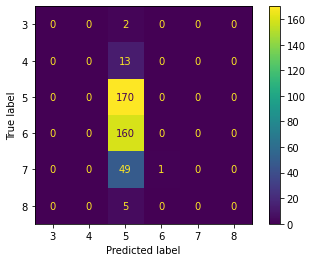

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

predictions = red_classifier.predict(redX_test_scaled)
cm = confusion_matrix(redy_test, predictions, labels=red_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=red_classifier.classes_)
disp.plot()

plt.savefig("Red Wine Logistic Regression Matrix"+'.jpg')

plt.show()

<Figure size 432x288 with 0 Axes>

# Scale White Wine Data

In [18]:
#assign data to X and y

whiteX = white[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
whitey = white["quality"].values.reshape(-1, 1)
print(whiteX.shape, whitey.shape)

(4898, 11) (4898, 1)


In [19]:
#train test split
from sklearn.model_selection import train_test_split

whiteX_train, whiteX_test, whitey_train, whitey_test = train_test_split(whiteX, whitey, stratify=whitey, random_state=42)

In [20]:
#scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

whiteX_scaler = StandardScaler().fit(whiteX_train)

In [21]:
# Transform the training and testing data using the X_scaler and y_scaler models

whiteX_train_scaled = whiteX_scaler.transform(whiteX_train)
whiteX_test_scaled = whiteX_scaler.transform(whiteX_test)

In [22]:
number_list = np.array(whitey_train)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[   3,   15],
       [   4,  122],
       [   5, 1093],
       [   6, 1648],
       [   7,  660],
       [   8,  131],
       [   9,    4]], dtype=int64)

In [23]:
number_list = np.array(whitey_test)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   5],
       [  4,  41],
       [  5, 364],
       [  6, 550],
       [  7, 220],
       [  8,  44],
       [  9,   1]], dtype=int64)

# White Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
white_classifier = LogisticRegression(max_iter = 20000)
white_classifier

LogisticRegression(max_iter=20000)

In [25]:
white_classifier = white_classifier.fit(whiteX_train, whitey_train.ravel())

In [26]:
print(f"Training Data Score: {white_classifier.score(whiteX_train, whitey_train)}")
print(f"Testing Data Score: {white_classifier.score(whiteX_test, whitey_test)}")

Training Data Score: 0.5401579090661585
Testing Data Score: 0.5322448979591837


In [27]:
#make predictions
predictions = white_classifier.predict(whiteX_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {whitey_test[:10].tolist()}")

First 10 Predictions:   [6 5 6 6 6 5 5 6 5 6]
First 10 Actual labels: [[5], [5], [5], [7], [6], [4], [3], [5], [6], [5]]


In [28]:
pd.DataFrame({"Prediction": predictions, "Actual": whitey_test.ravel()}).reset_index(drop=True)

,Prediction,Actual
0,6,5
1,5,5
2,6,5
3,6,7
4,6,6
...,...,...
1220,5,6
1221,5,5
1222,6,5
1223,6,7


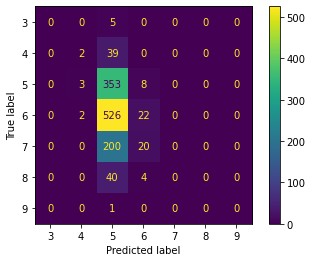

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

predictions = white_classifier.predict(whiteX_test_scaled)
cm = confusion_matrix(whitey_test, predictions, labels=white_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=white_classifier.classes_)
disp.plot()

plt.savefig("White Wine Logistic Regression Matrix"+'.jpg')

plt.show()